In [1]:
import logging
import matplotlib.pyplot as plt
import requests

import ddlpy

logging.basicConfig(level=logging.DEBUG)
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


# Get a list of all known locations
The  method locations gets a list of all known measurement locations by sending a request. 

In [2]:
locations = ddlpy.locations()

DEBUG:ddlpy.ddlpy:requesting: https://waterwebservices.rijkswaterstaat.nl/METADATASERVICES_DBO/OphalenCatalogus with {"CatalogusFilter": {"Eenheden": true, "Grootheden": true, "Hoedanigheden": true, "Parameters": true, "Compartimenten": true}}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): waterwebservices.rijkswaterstaat.nl:443
DEBUG:urllib3.connectionpool:https://waterwebservices.rijkswaterstaat.nl:443 "POST /METADATASERVICES_DBO/OphalenCatalogus HTTP/1.1" 200 None


In [3]:
locations.to_csv(r'locations.csv')

In [4]:
locations['Code'] = locations.index
locations

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
BRUINSBNN,95355,25831,575630.130044,5.724596e+06,Bruinisse binnen,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,BRUINSBNN
KRAMMR,95557,25831,575753.628658,5.724490e+06,Krammer,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,KRAMMR
APPZK20,95865,25831,514144.416408,5.704883e+06,Appelzak 20 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,APPZK20
BATHBI71,95920,25831,581099.926393,5.693137e+06,Bath boei 71,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,BATHBI71
BOCHTVSJCB,95933,25831,577615.572113,5.726581e+06,Bocht van St Jacob,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,BOCHTVSJCB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOBPTN,96485,25831,712875.305959,5.749341e+06,Lobith ponton,Massafractie tetrabutyltin in Zwevende stof ui...,ZS,Zwevende stof,ug/kg,microgram per kilogram,MASSFTE,Massafractie,Sndg,uitgedrukt in tin / drooggewicht,T4C4ySn,tetrabutyltin,LOBPTN
SCHAARVODDL,96894,25831,587094.242672,5.689522e+06,Schaar van Ouden Doel,Massafractie tetrabutyltin in Zwevende stof ui...,ZS,Zwevende stof,ug/kg,microgram per kilogram,MASSFTE,Massafractie,Sndg,uitgedrukt in tin / drooggewicht,T4C4ySn,tetrabutyltin,SCHAARVODDL
SASVGT,96926,25831,556036.115558,5.673516e+06,Sas van Gent,Massafractie tetrabutyltin in Zwevende stof ui...,ZS,Zwevende stof,ug/kg,microgram per kilogram,MASSFTE,Massafractie,Sndg,uitgedrukt in tin / drooggewicht,T4C4ySn,tetrabutyltin,SASVGT


## Validate
Check  if data is in the domain of the Netherlands. It also includes data of the North Sea.

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\ProgramData\\Anaconda3\\envs\\nck\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


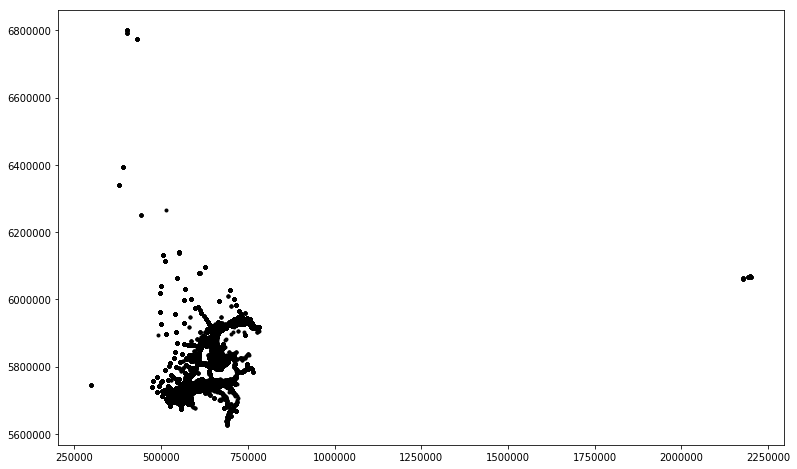

In [5]:
# Create a spatial plot
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(locations.X, locations.Y, 'k.')

In [6]:
# CHECK See what the data in the east is. 
locations.sort_values('X',  ascending=False).head(n=5)

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
PRIPYHGIII1,97967,25831,2.199824e+06,6.067918e+06,PRIPYAT hoofdgeul III.1,Temperatuur Oppervlaktewater oC,OW,Oppervlaktewater,oC,graad Celsius,T,Temperatuur,NVT,Niet van toepassing,NVT,Waarde is niet van toepassing,PRIPYHGIII1
PRIPYHGIII1,97967,25831,2.199824e+06,6.067918e+06,PRIPYAT hoofdgeul III.1,Verzadigingsgraad zuurstof in Oppervlaktewater %,OW,Oppervlaktewater,%,procent,VERZDGGD,Verzadigingsgraad,NVT,Niet van toepassing,O2,zuurstof,PRIPYHGIII1
PRIPYHGIII1,97967,25831,2.199824e+06,6.067918e+06,PRIPYAT hoofdgeul III.1,Zuurgraad Oppervlaktewater,OW,Oppervlaktewater,DIMSLS,dimensieloos,pH,Zuurgraad,NVT,Niet van toepassing,NVT,Waarde is niet van toepassing,PRIPYHGIII1
PRIPYPSIII1,97957,25831,2.199683e+06,6.067206e+06,PRIPYAT plas III.1,Geleidendheid Oppervlaktewater t.o.v. 20 grade...,OW,Oppervlaktewater,mS/m,millisiemens per meter,GELDHD,Geleidendheid,20oC,t.o.v. 20 graden Celsius,NVT,Waarde is niet van toepassing,PRIPYPSIII1
PRIPYPSIII1,97957,25831,2.199683e+06,6.067206e+06,PRIPYAT plas III.1,Temperatuur Oppervlaktewater oC,OW,Oppervlaktewater,oC,graad Celsius,T,Temperatuur,NVT,Niet van toepassing,NVT,Waarde is niet van toepassing,PRIPYPSIII1


In [7]:
codes = ['HOEKVHLD', 'IJMDBTHVN','SCHEVNGN']
parameters = ['WATHTE']
selected = locations[locations.index.isin(codes)]
selected = selected[selected['Grootheid.Code'].isin(parameters)]
selected

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
HOEKVHLD,93728,25831,576917.669784,5.759136e+06,Hoek van Holland,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,HOEKVHLD
IJMDBTHVN,93757,25831,605633.035699,5.813598e+06,IJmuiden buitenhaven,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,IJMDBTHVN
SCHEVNGN,93858,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,SCHEVNGN


In [8]:
names = 'uit de kust'
selected = locations[locations.Naam.str.contains(''.join(names))].head()
selected

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
APPZK20,95865,25831,514144.416408,5.704883e+06,Appelzak 20 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,APPZK20
GOERE6,96206,25831,560056.490959,5.746818e+06,Goeree 6 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,GOERE6
NOORDWK10,96582,25831,588722.435888,5.795362e+06,Noordwijk 10 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,NOORDWK10
NOORDWK2,96585,25831,595875.376191,5.790953e+06,Noordwijk 2 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,NOORDWK2
NOORDWK30,96592,25831,571235.381503,5.804566e+06,Noordwijk 30 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter k...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dk0002dg,diameter kleiner dan 2 um / drooggewicht,NVT,Waarde is niet van toepassing,NOORDWK30


In [9]:
# numtiple parameters avaialble per location
# each combination is a row
locations.loc['IJMDBTHVN']

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,
IJMDBTHVN,93757,25831,605633.035699,5.813598e+06,IJmuiden buitenhaven,Waterhoogte berekend Oppervlaktewater t.o.v. N...,OW,Oppervlaktewater,cm,centimeter,WATHTBRKD,Waterhoogte berekend,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,IJMDBTHVN
IJMDBTHVN,93757,25831,605633.035699,5.813598e+06,IJmuiden buitenhaven,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,IJMDBTHVN
IJMDBTHVN,93757,25831,605633.035699,5.813598e+06,IJmuiden buitenhaven,Temperatuur Oppervlaktewater oC,OW,Oppervlaktewater,oC,graad Celsius,T,Temperatuur,NVT,Niet van toepassing,NVT,Waarde is niet van toepassing,IJMDBTHVN


In [10]:
from datetime import datetime
locations = ddlpy.measurements(locations.loc['SCHEVNGN'],datetime(2019,1,1),datetime(2020,2,1))

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]DEBUG:ddlpy.ddlpy:requesting:  {'AquoPlusWaarnemingMetadata': {'AquoMetadata': {'Eenheid': {'Code': Code
SCHEVNGN    cm
SCHEVNGN    cm
Name: Eenheid.Code, dtype: object}, 'Grootheid': {'Code': Code
SCHEVNGN    WATHTBRKD
SCHEVNGN       WATHTE
Name: Grootheid.Code, dtype: object}, 'Hoedanigheid': {'Code': Code
SCHEVNGN    NAP
SCHEVNGN    NAP
Name: Hoedanigheid.Code, dtype: object}}}, 'Locatie': {'X': Code
SCHEVNGN    586550.994421
SCHEVNGN    586550.994421
Name: X, dtype: float64, 'Y': Code
SCHEVNGN    5.772806e+06
SCHEVNGN    5.772806e+06
Name: Y, dtype: float64, 'Code': Code
SCHEVNGN    SCHEVNGN
SCHEVNGN    SCHEVNGN
Name: Code, dtype: object}, 'Periode': {'Begindatumtijd': '2019-01-01T00:00:00.000+00:00', 'Einddatumtijd': '2019-02-01T00:00:00.000+00:00'}}



TypeError: Object of type Series is not JSON serializable